# Tabular data augmentation with score-based generative models 

In [161]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [162]:
import pandas as pd
import matplotlib.pyplot as plt

In [163]:
from src.utils import load_config
from src.data import Data
from src.runner.scorenet import ScoreNetRunner

In [164]:
df = pd.read_csv("datasets/credit_data.csv")

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   object
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_employment_since    1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   sex                         1000 non-null   object
 10  personal_status             1000 non-null   object
 11  other_debtors               1000 non-null   object
 12  present_residence_since     1000 non-null   int64 
 13  property                    1000 non-null   objec

In [166]:
df.default.value_counts(normalize=True)

Not default    0.7
Default        0.3
Name: default, dtype: float64

In [167]:
# only selects entries which have defaulted on their credit

df_default = df.loc[df.default=="Default", :]

In [172]:
cfg = load_config("config.yaml")
cfg

{'data': {'numeric': ['duration_in_month',
   'credit_amount',
   'installment_as_income_perc',
   'present_residence_since',
   'age',
   'credits_this_bank',
   'people_under_maintenance'],
  'category': ['default',
   'account_check_status',
   'credit_history',
   'purpose',
   'savings',
   'present_employment_since',
   'sex',
   'personal_status',
   'other_debtors',
   'property',
   'other_installment_plans',
   'housing',
   'job',
   'telephone',
   'foreign_worker'],
  'target': 'default',
  'reference': 'Default',
  'classification': True,
  'test_prop': 0.2,
  'batch_size': 32,
  'logit_transform': False},
 'model': {'input_layer': [['Linear', 47, 512], ['Dropout', 0.1], ['ReLU']],
  'hidden_layers': [['Linear', 512, 256], ['Dropout', 0.1], ['ReLU']],
  'output_layer': [['Linear', 256, 47]]},
 'training': {'n_epochs': 50000,
  'n_iters': 10000000000000,
  'noise_std': 0.01,
  'n_particles': 1,
  'algo': 'dsm',
  'snapshot_freq': 30000,
  'eval_freq': 500,
  'resume_traini

In [173]:
data = Data(cfg["data"])
print(data) 

data.preprocess(df_default)

Data(target=default, classification=True, reference=Default, test_prop=0.2, batch_size=32)


c:\Users\pemma\OneDrive - GENES\Ensae\S2\DL\Projet\tabular-sbgm\env\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [174]:
runner = ScoreNetRunner(cfg, data) 
runner

ScoreNetRunner(config={'data': {'numeric': ['duration_in_month', 'credit_amount', 'installment_as_income_perc', 'present_residence_since', 'age', 'credits_this_bank', 'people_under_maintenance'], 'category': ['default', 'account_check_status', 'credit_history', 'purpose', 'savings', 'present_employment_since', 'sex', 'personal_status', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job', 'telephone', 'foreign_worker'], 'target': 'default', 'reference': 'Default', 'classification': True, 'test_prop': 0.2, 'batch_size': 32, 'logit_transform': False}, 'model': {'input_layer': [['Linear', 47, 512], ['Dropout', 0.1], ['ReLU']], 'hidden_layers': [['Linear', 512, 256], ['Dropout', 0.1], ['ReLU']], 'output_layer': [['Linear', 256, 47]]}, 'training': {'n_epochs': 50000, 'n_iters': 10000000000000, 'noise_std': 0.01, 'n_particles': 1, 'algo': 'dsm', 'snapshot_freq': 30000, 'eval_freq': 500, 'resume_training': False}, 'optim': {'optimizer': {'weight_decay': 0.0, 'name': 'Adam'

In [175]:
train_loss, test_loss = runner.train()

  0%|          | 0/50000 [00:00<?, ?it/s]

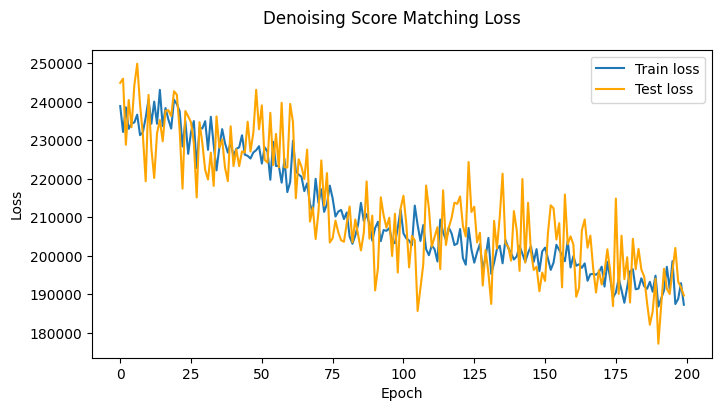

In [79]:
fig, ax = plt.subplots(figsize=(8, 4))
fig.suptitle("Denoising Score Matching Loss")

ax.plot(train_loss, label="Train loss")
ax.plot(test_loss, label="Test loss", color="orange")

ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.legend(); 